# [Explore Happiness Data Using Python Pivot Tables](https://www.dataquest.io/blog/pandas-pivot-table/)

In [10]:
import pandas as pd
import numpy as np

## Read in the data

In [9]:
data = pd.read_csv('https://s3.amazonaws.com/dq-content/blog/pivot_table/data.csv', index_col=0)
data.head(2)

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Afghanistan,Southern Asia,153.0,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210,2015
1,Albania,Central and Eastern Europe,95.0,4.959,0.87867,0.80434,0.81325,0.35733,0.06413,0.14272,1.89894,2015


## Sort the df by |^ years and |v  happiness score


In [8]:
data.sort_values(['Year', 'Happiness Score'], ascending=[True, False], inplace=True)
data.head(2)

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
141,Switzerland,Western Europe,1.0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
60,Iceland,Western Europe,2.0,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015


### Getting an overview of the data and check for missing values

In [11]:
print "Our Data has {0} rows and {1} columns".format(data.shape[0], data.shape[1])
print "Are there missing values? {}".format(data.isnull().any().any())
data.describe()

Our Data has 495 rows and 12 columns
Are there missing values? True


,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,495.000000
mean,78.829787,5.370728,0.927830,0.990347,0.579968,0.402828,0.134790,0.242241,2.092717,2016.000000
std,45.281408,1.136998,0.415584,0.318707,0.240161,0.150356,0.111313,0.131543,0.565772,0.817323
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580,2015.000000
25%,40.000000,4.509000,0.605292,0.793000,0.402301,0.297615,0.059777,0.152831,1.737975,2015.000000
50%,79.000000,5.282500,0.995439,1.025665,0.630053,0.418347,0.099502,0.223140,2.094640,2016.000000
75%,118.000000,6.233750,1.252443,1.228745,0.768298,0.516850,0.173161,0.315824,2.455575,2017.000000
max,158.000000,7.587000,1.870766,1.610574,1.025250,0.669730,0.551910,0.838075,3.837720,2017.000000


## PIVOT TABLE TIME:  most values default, but you need DATA & INDEX
### * data is the dataframe
### * index is the column, grouper, array... you'd like to grop data by
### * values (optional) is the column you'd like to aggregate.  Will do all of not specified.

In [12]:
# Group by Year, and report average Happiness Score for that year
pd.pivot_table(data, index='Year', values='Happiness Score')

,Happiness Score
Year,
2015,5.375734
2016,5.382185
2017,5.354019


In [13]:
# Let's use Region as Index:
pd.pivot_table(data, index='Region', values='Happiness Score')

,Happiness Score
Region,
Australia and New Zealand,7.302500
Central and Eastern Europe,5.371184
Eastern Asia,5.632333
Latin America and Caribbean,6.069074
Middle East and Northern Africa,5.387879
North America,7.227167
Southeastern Asia,5.364077
Southern Asia,4.590857
Sub-Saharan Africa,4.150957


### More complex pivots, multi-index

In [14]:
# Categorize by Region and Year
pd.pivot_table(data, index=['Region', 'Year'], values='Happiness Score')

Happiness Score
Region                          Year                 
Australia and New Zealand       2015         7.285000
                                2016         7.323500
                                2017         7.299000
Central and Eastern Europe      2015         5.332931
                                2016         5.370690
                                2017         5.409931
Eastern Asia                    2015         5.626167
                                2016         5.624167
                                2017         5.646667
Latin America and Caribbean     2015         6.144682
                                2016         6.101750
                                2017         5.957818
Middle East and Northern Africa 2015         5.406900
                                2016         5.386053
                                2017         5.369684
North America                   2015         7.273000
                                2016         7.254000
                                2017         7.154500
Southeastern Asia               2015         5.317444
                                2016         5.338889
                                2017         5.444875
Southern Asia                   2015         4.580857
                                2016         4.563286
                                2017         4.628429
Sub-Saharan Africa              2015         4.202800
                                2016         4.136421
                                2017         4.111949
Western Europe                  2015         6.689619
                                2016         6.685667
                                2017         6.703714

### COLUMNS!  spread the different values horizontally...

In [15]:
# Using Year as the Columns argument will display values for year...
pd.pivot_table(data, index='Region', columns='Year', values='Happiness Score')

Year,2015,2016,2017
Region,,,
Australia and New Zealand,7.285000,7.323500,7.299000
Central and Eastern Europe,5.332931,5.370690,5.409931
Eastern Asia,5.626167,5.624167,5.646667
Latin America and Caribbean,6.144682,6.101750,5.957818
Middle East and Northern Africa,5.406900,5.386053,5.369684
North America,7.273000,7.254000,7.154500
Southeastern Asia,5.317444,5.338889,5.444875
Southern Asia,4.580857,4.563286,4.628429
Sub-Saharan Africa,4.202800,4.136421,4.111949


### Just add 'plot()' at end of pivot_table to visualize

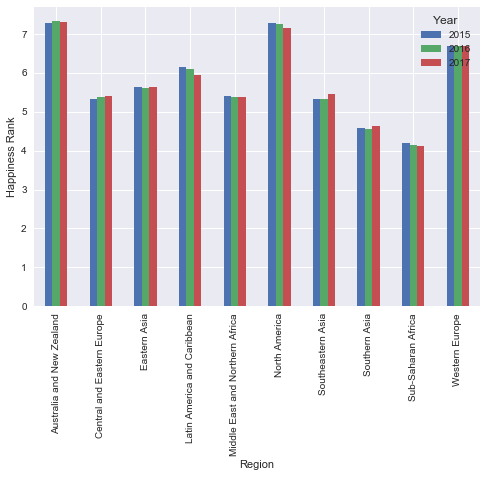

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# Use Seaborn styles
sns.set()

pd.pivot_table(data, index='Region', columns='Year', values='Happiness Score').plot(kind='bar')
plt.ylabel('Happiness Rank')

### Manipulating data using `aggfunc`
### aggfunc: (optional) accepts a function or list of functions to use on group (default: numpy.mean)

In [17]:
# Let's use median, minimum, maximum and std deviation for each region...
pd.pivot_table(data, index='Region', values='Happiness Score',
              aggfunc=[np.mean, np.median, min, max, np.std])

,mean,median,min,max,std
,Happiness Score,Happiness Score,Happiness Score,Happiness Score,Happiness Score
Region,,,,,
Australia and New Zealand,7.302500,7.2995,7.284,7.334,0.020936
Central and Eastern Europe,5.371184,5.4010,4.096,6.609,0.578274
Eastern Asia,5.632333,5.6545,4.874,6.422,0.502100
Latin America and Caribbean,6.069074,6.1265,3.603,7.226,0.728157
Middle East and Northern Africa,5.387879,5.3175,3.006,7.278,1.031656
North America,7.227167,7.2175,6.993,7.427,0.179331
Southeastern Asia,5.364077,5.2965,3.819,6.798,0.882637
Southern Asia,4.590857,4.6080,3.360,5.269,0.535978


### Applying custom functions

In [20]:
# we can even use lambdas
pd.pivot_table(data, index='Region', values='Happiness Score',
              aggfunc=[np.mean, min, max, np.std, lambda x: x.count()/3])

,mean,min,max,std,<lambda>
,Happiness Score,Happiness Score,Happiness Score,Happiness Score,Happiness Score
Region,,,,,
Australia and New Zealand,7.302500,7.284,7.334,0.020936,2.0
Central and Eastern Europe,5.371184,4.096,6.609,0.578274,29.0
Eastern Asia,5.632333,4.874,6.422,0.502100,6.0
Latin America and Caribbean,6.069074,3.603,7.226,0.728157,22.0
Middle East and Northern Africa,5.387879,3.006,7.278,1.031656,19.0
North America,7.227167,6.993,7.427,0.179331,2.0
Southeastern Asia,5.364077,3.819,6.798,0.882637,8.0
Southern Asia,4.590857,3.360,5.269,0.535978,7.0


### We can remove outliers...

In [21]:
# create a function to remove outlier values between 0.25th and 0.75th quantiles...
def remove_outliers(values):
    mid_quantiles = values.quantile([0.25, 0.75])
    return np.mean(mid_quantiles)

pd.pivot_table(data, index='Region', values='Happiness Score',
              aggfunc=[np.mean, remove_outliers, lambda x: x.count()/3])

,mean,remove_outliers,<lambda>
,Happiness Score,Happiness Score,Happiness Score
Region,,,
Australia and New Zealand,7.302500,7.299125,2.0
Central and Eastern Europe,5.371184,5.449250,29.0
Eastern Asia,5.632333,5.610125,6.0
Latin America and Caribbean,6.069074,6.192750,22.0
Middle East and Northern Africa,5.387879,5.508500,19.0
North America,7.227167,7.244875,2.0
Southeastern Asia,5.364077,5.470125,8.0
Southern Asia,4.590857,4.707500,7.0


### Categorizing using string manipulation
* Assign pivot table to variable, then add filter

In [22]:
# For example, we can filter for regions that contain 'Asia'
table = pd.pivot_table(data, index='Region', values='Happiness Score',
                      aggfunc=[np.mean, remove_outliers])
table[table.index.str.contains('Asia')]

,mean,remove_outliers
,Happiness Score,Happiness Score
Region,,
Eastern Asia,5.632333,5.610125
Southeastern Asia,5.364077,5.470125
Southern Asia,4.590857,4.707500


In [23]:
table[table.index.str.contains('Europe')]

,mean,remove_outliers
,Happiness Score,Happiness Score
Region,,
Central and Eastern Europe,5.371184,5.44925
Western Europe,6.693000,6.84650


### More than one column, use `df.query`
* This will work on conditional multi-indexes

In [24]:
table = pd.pivot_table(data, index=['Region', 'Year'], values='Happiness Score',
                      aggfunc=[np.mean, remove_outliers])
table.query('Year == [2015, 2017] and Region == ["Sub-Saharan Africa", "Middle East and Northern Africa"]')

mean remove_outliers
                                     Happiness Score Happiness Score
Region                          Year                                
Middle East and Northern Africa 2015        5.406900        5.515875
                                2017        5.369684        5.425500
Sub-Saharan Africa              2015        4.202800        4.168375
                                2017        4.111949        4.118000

### Handling missing data: `dropna`, `fill_value`
* `dropna`: boolean, include NaN values
* `fill_value`: scalar, choose a value to replace missing values (default: None)

### `qcut()`: built in pandas function to split data into quantiles
* ex: `pd.qcut(data["Happiness Score"], 4)` results in 4 quantiles, 0-25, 25-50, 50-75 and 75-100%

In [25]:
# Lets split the score into 3 quantiles
score = pd.qcut(data["Happiness Score"], 4)
pd.pivot_table(data, index=['Region', score], values='Happiness Score',
              aggfunc='count').head(9)

Happiness Score
Region                     Happiness Score                 
Australia and New Zealand  (2.692, 4.509]               NaN
                           (4.509, 5.283]               NaN
                           (5.283, 6.234]               NaN
                           (6.234, 7.587]               6.0
Central and Eastern Europe (2.692, 4.509]              10.0
                           (4.509, 5.283]              28.0
                           (5.283, 6.234]              46.0
                           (6.234, 7.587]               3.0
Eastern Asia               (2.692, 4.509]               NaN

In [26]:
# let's repeat that but fill the NaNs with 0...
score = pd.qcut(data["Happiness Score"], 3)
pd.pivot_table(data, index=['Region', score], values="Happiness Score",
              aggfunc='count', fill_value=0)

Happiness Score
Region                          Happiness Score                 
Australia and New Zealand       (2.692, 4.79]                  0
                                (4.79, 5.895]                  0
                                (5.895, 7.587]                 6
Central and Eastern Europe      (2.692, 4.79]                 15
                                (4.79, 5.895]                 58
                                (5.895, 7.587]                14
Eastern Asia                    (2.692, 4.79]                  0
                                (4.79, 5.895]                 11
                                (5.895, 7.587]                 7
Latin America and Caribbean     (2.692, 4.79]                  4
                                (4.79, 5.895]                 19
                                (5.895, 7.587]                45
Middle East and Northern Africa (2.692, 4.79]                 18
                                (4.79, 5.895]                 20
                                (5.895, 7.587]                20
North America                   (2.692, 4.79]                  0
                                (4.79, 5.895]                  0
                                (5.895, 7.587]                 6
Southeastern Asia               (2.692, 4.79]                  6
                                (4.79, 5.895]                 12
                                (5.895, 7.587]                 8
Southern Asia                   (2.692, 4.79]                 13
                                (4.79, 5.895]                  8
                                (5.895, 7.587]                 0
Sub-Saharan Africa              (2.692, 4.79]                101
                                (4.79, 5.895]                 16
                                (5.895, 7.587]                 0
Western Europe                  (2.692, 4.79]                  0
                                (4.79, 5.895]                 12
                                (5.895, 7.587]                51

### Adding total rows/columns
* `margins`: boolean, allows you to add an `all` row/columns, for subtotals, grand totals (default: False)
* `margins_name`: string, accepts name of row/column to contain totals if margins is True (default: 'All')

In [28]:
score = pd.qcut(data["Happiness Score"], 3)
# creating a pivot table and only display first 9 values
pd.pivot_table(data, index=['Region', score], values="Happiness Score",
              aggfunc='count', fill_value=0, margins=True, margins_name='Total count')

Happiness Score
Region                          Happiness Score                 
Australia and New Zealand       (2.692, 4.79]                0.0
                                (4.79, 5.895]                0.0
                                (5.895, 7.587]               6.0
Central and Eastern Europe      (2.692, 4.79]               15.0
                                (4.79, 5.895]               58.0
                                (5.895, 7.587]              14.0
Eastern Asia                    (2.692, 4.79]                0.0
                                (4.79, 5.895]               11.0
                                (5.895, 7.587]               7.0
Latin America and Caribbean     (2.692, 4.79]                4.0
                                (4.79, 5.895]               19.0
                                (5.895, 7.587]              45.0
Middle East and Northern Africa (2.692, 4.79]               18.0
                                (4.79, 5.895]               20.0
                                (5.895, 7.587]              20.0
North America                   (2.692, 4.79]                0.0
                                (4.79, 5.895]                0.0
                                (5.895, 7.587]               6.0
Southeastern Asia               (2.692, 4.79]                6.0
                                (4.79, 5.895]               12.0
                                (5.895, 7.587]               8.0
Southern Asia                   (2.692, 4.79]               13.0
                                (4.79, 5.895]                8.0
                                (5.895, 7.587]               0.0
Sub-Saharan Africa              (2.692, 4.79]              101.0
                                (4.79, 5.895]               16.0
                                (5.895, 7.587]               0.0
Western Europe                  (2.692, 4.79]                0.0
                                (4.79, 5.895]               12.0
                                (5.895, 7.587]              51.0
Total count                                                470.0